In [10]:
from causal_util import load_env
from sparse_causal_model_learner_rl.sacred_gin_tune.sacred_wrapper import load_config_files
from matplotlib import pyplot as plt

In [28]:
def plot_obs_components_now(env, figsize=(15, 20)):
    """Given a KeyChest environmnet, plot the state and its observed components."""
    obs = env.engine.observation
    h, w = env.engine._observation.shape[0:2]
    outputs = env.engine.select_outputs
    obs = obs.reshape(h, w, len(outputs))
    outs = {out: obs[:, :, idx] for idx, out in enumerate(outputs)}
    fig = plt.figure(figsize=figsize)
    plt.title("Sub-observation")
    plt.subplot(1, len(outputs) + 1, 1)
    plt.imshow(env.render())
    
    plt.axis('off')


    for idx, out in enumerate(outputs):
        plt.subplot(1, len(outputs) + 1, idx + 2)
        plt.title(out)
        plt.imshow(outs[out])

        plt.axis('off')

    return fig
        
def show_rollout(env):
    """Plot one rollout from the KeyChest env."""
    env.reset()
    plot_obs_components_now(env)
    plt.show()

    done = False
    while not done:
        obs, rew, done, info = env.step(env.action_space.sample())
        plot_obs_components_now(env)
        plt.show()

Make environment KeyChest-v0 None {}


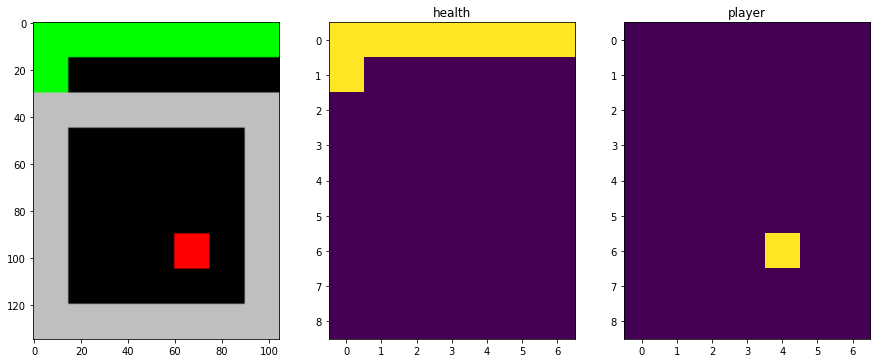

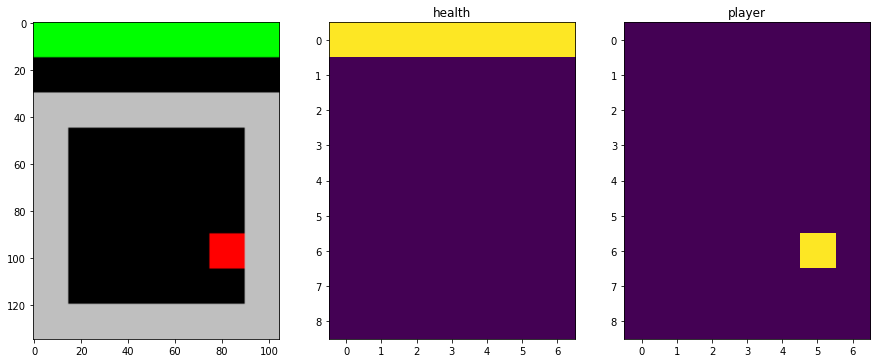

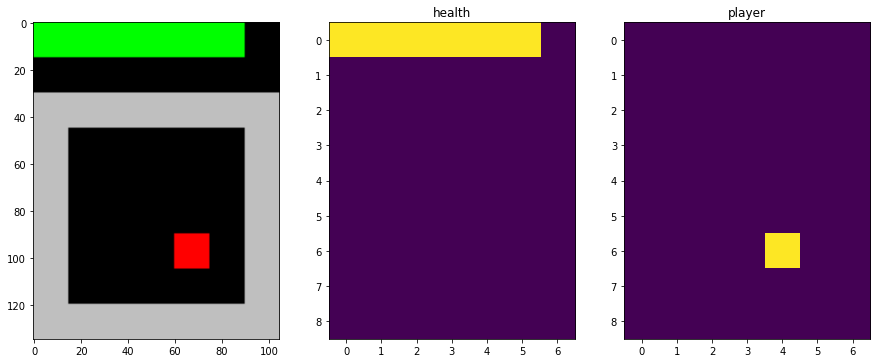

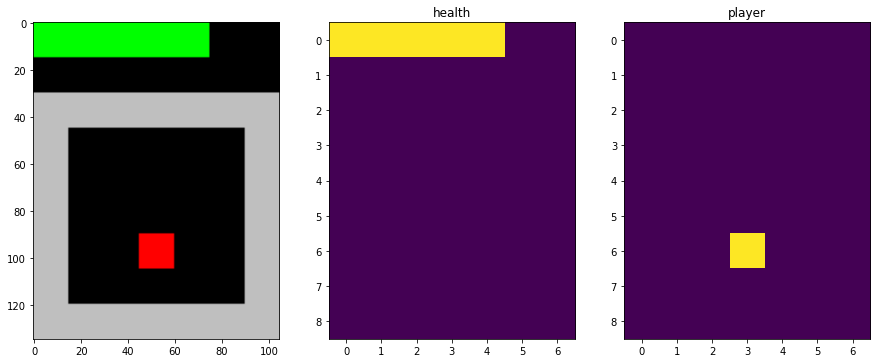

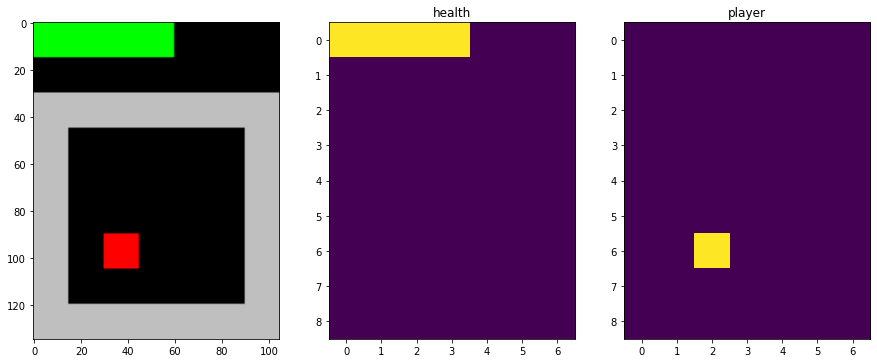

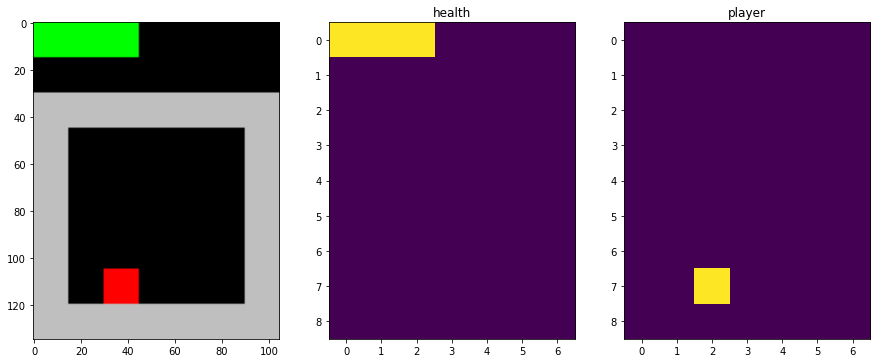

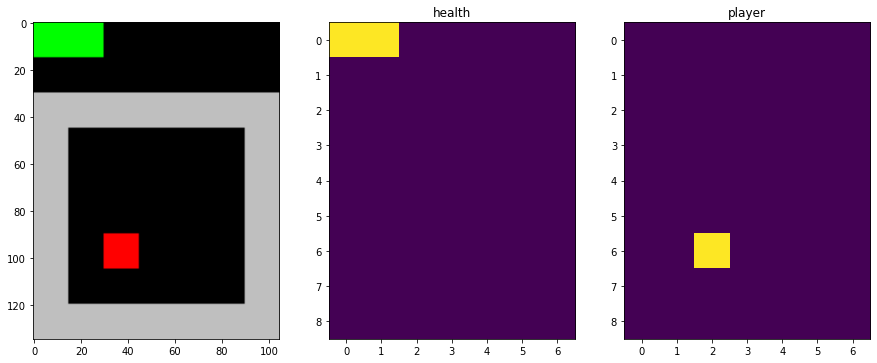

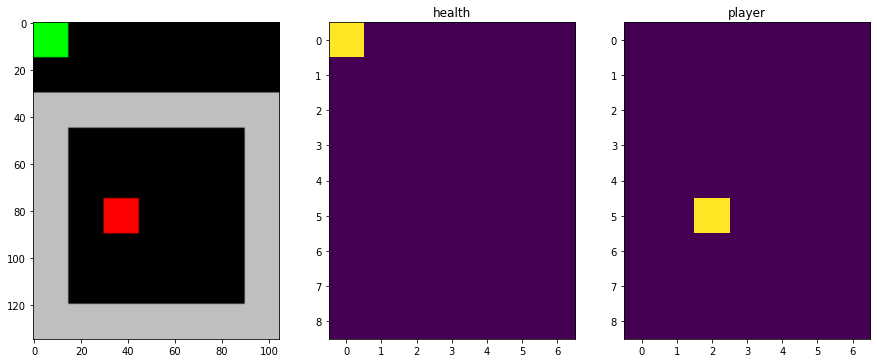

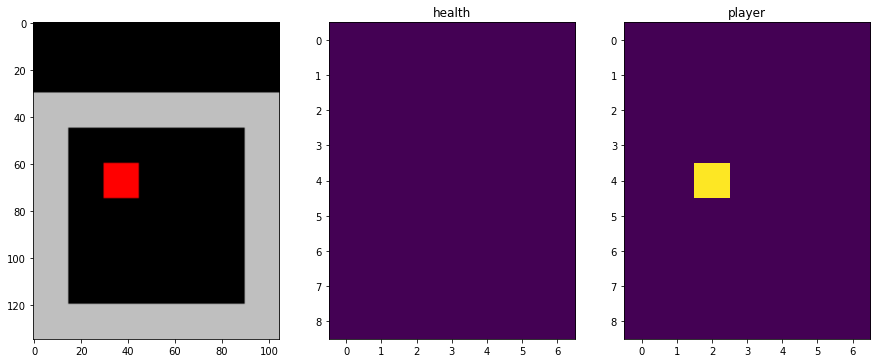

In [12]:
load_config_files(['../keychest/config/5x5_onlycoord_obs.gin'])
env = load_env()
show_rollout(env)

Make environment KeyChest-v0 None {}


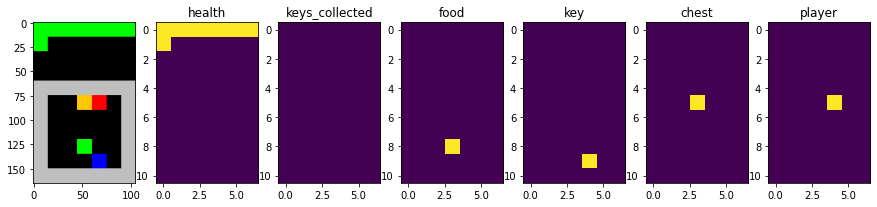

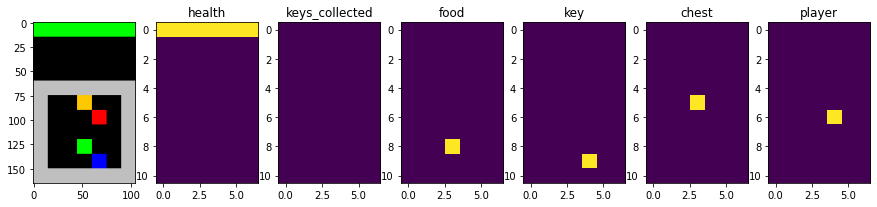

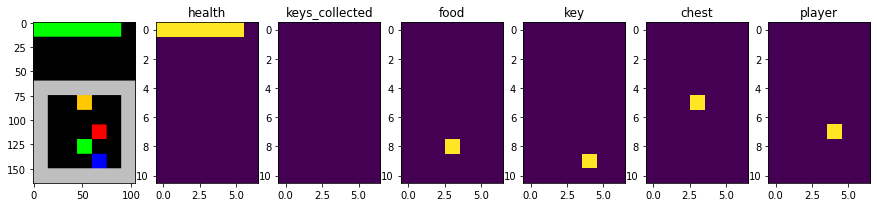

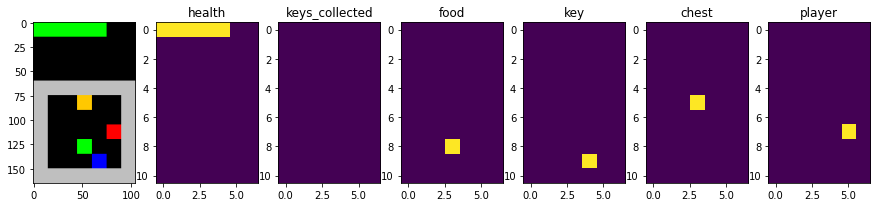

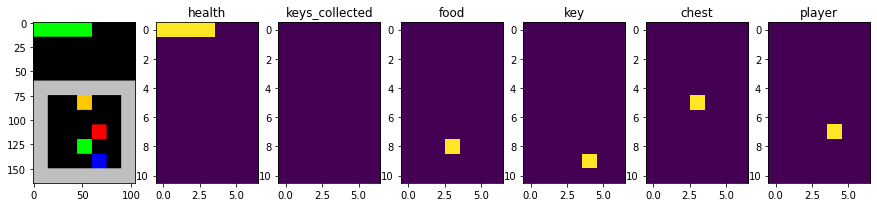

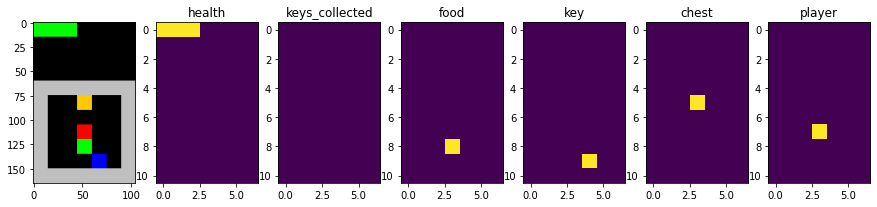

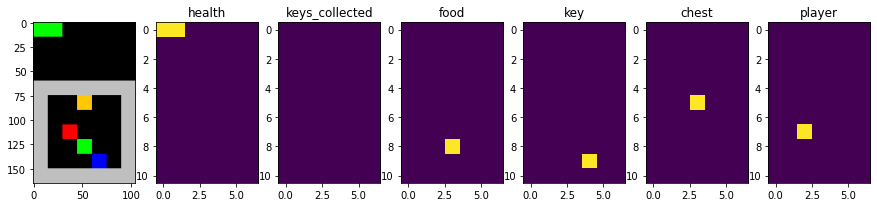

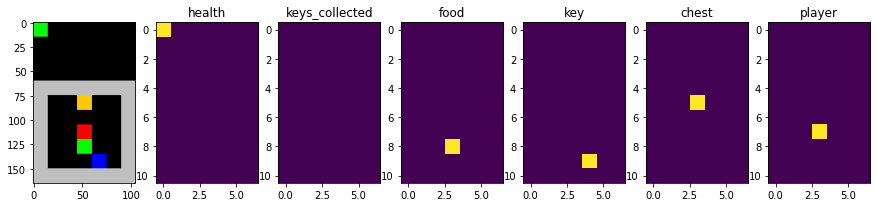

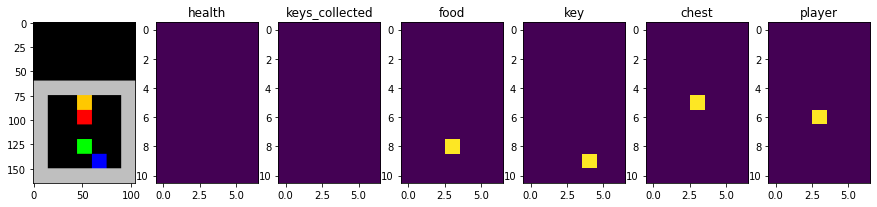

In [13]:
load_config_files(['../keychest/config/5x5_1f1c1k_obs.gin'])
env = load_env()
show_rollout(env)

In [224]:
load_config_files(['../keychest/config/5x5_1f1c1k_lamp_obs.gin'])
env = load_env()

Make environment KeyChest-v0 None {}


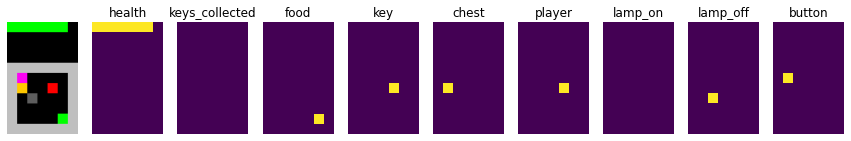

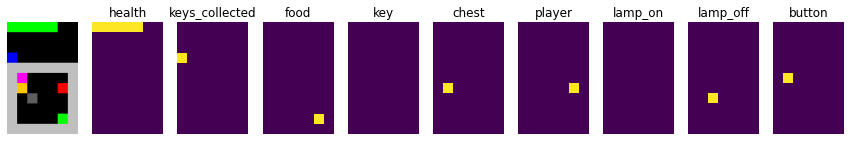

In [227]:
fig1 = plot_obs_components_now(env)
_ = env.step(env.action_space.sample())
fig2 = plot_obs_components_now(env)

In [229]:
fig1.savefig('../../keychest_5x5_1f1c1k_pre.pdf', bbox_inches='tight')
fig2.savefig('../../keychest_5x5_1f1c1k_post.pdf', bbox_inches='tight')